This notebook shows examples of how to use AART with these astrophysical profiles can be used, and how the data is stored and accessed. Running this notebook takes less than ~2 minutes in a single CPU (Apple M2 Max) time!

Feel free to use this code (**with attribution to Ref. [1]**) for your research or to produce visualizations for your next presentation! 

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import subprocess

# Import custom functions and parameters
from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
import fileloading
from astropy import units as u

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


A directory (Results) was created to store the results


# Computation of the lensing bands

In [2]:
%time !python3 lensingbands.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Computing the lensing bands
Number of points in the n=0 grid  4000000
Number of points in the n=1 grid  4000000
Number of points in the n=2 grid  4000000
File  ./Results/LensingBands_a_0.9375_i_17.h5  created.
CPU times: user 157 ms, sys: 70 ms, total: 227 ms
Wall time: 28.4 s


## Reading the sizes of the lensing bands calculation

In [3]:
fnbands= path + "LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

lim0=int(h5f["lim0"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.9375_i_17.h5


# Analytical Ray-tracing

In [4]:
%time !python3 raytracing.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Ray-tracing
Reading file:  ./Results/LensingBands_a_0.9375_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.9375_i_17.h5  created.

A total of 12000000 photons were ray-traced
CPU times: user 214 ms, sys: 95.7 ms, total: 310 ms
Wall time: 39.9 s


# Calculating the emission angle ($\theta_{\rm B}$)

In [5]:
%time !python3 magneticangle.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Magnetic Angle
using default lband
Reading file:  ./Results/LensingBands_a_0.9375_i_17.h5
using default rtray
Reading file:  ./Results/Rays_a_0.9375_i_17.h5
File  ./Results/MagneticAngle_a_0.9375_i_17.h5  created.
CPU times: user 21.3 ms, sys: 23.6 ms, total: 44.9 ms
Wall time: 3.11 s


# Setting the parameters of the astrophysical model

In [6]:
brightparams = {
    "nu0": 90e9,  # Observation frequency
    "mass": (MMkg * u.kg).to(u.g).value,  # Black hole mass
    "scale_height": .5,  # 2 scale_height
    "theta_b": 50.0 * (np.pi / 180),  # impact parameter, if assumed fixed
    "beta": 1.0,  # legacy (not used)
    "r_ie": 10.0,  # legacy (not used)
    "rb_0": 5,  # radius at which power laws equal base values
    "n_th0": 1.9e4,  # density power law base value
    "t_e0": 7e10,  # temperature power law base value
    "b_0": 8.13, # magnetic field power law base value
    "p_dens": -0.7,  # density power law exponent
    "p_temp": -1.0,  # temperature power law exponent
    "p_mag": -1.5,  # magnetic power law exponent
    "nscale": 0.2  # Scale of inoisy if used
}

funckeys = {
		"emodelkey" : 0, # emodelkey Emission Model choice, 0 = thermal ultrarelativistic, 1 = power law (1 is WIP)
        "bkey" : 2,      # Type of magnetic field profile , 0 = true function from brodrick and loeb eq. 3, 1 = power law with lmfit values of 0, 2 = power law from values set in brightparams
        "nnoisykey" : 0, # nnoisykey Inoisy density. 0 = no noise, 1 = noise
        "tnoisykey" : 0, # tnoisykey Inoisy temperature
        "bnoisykey" : 0, # bnoisykey Inoisy magnetic field
        "theta_bkey": 0 # Variable impact parameter, 0 for varied, 1 for fixed
}

In [7]:
cmd= fileloading.createIntensityArgs(brightparams,funckeys=funckeys) # create the neccesary command line argument

In [8]:
%time subprocess.run([cmd], shell=True)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


using default rtray
Reading file:  ./Results/Rays_a_0.9375_i_17.h5
using default magAng
Intensity
using default lband
Reading file:  ./Results/LensingBands_a_0.9375_i_17.h5
Reading file:  ./Results/Rays_a_0.9375_i_17.h5
File  ./Results/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.130e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_0_tnkey_0_bnkey_0_magkey_0.h5  created.
CPU times: user 2.04 ms, sys: 13.3 ms, total: 15.4 ms
Wall time: 5.33 s


CompletedProcess(args=['python3 radialintensity.py --nu 90000000000.0 --mass 1.2924827500377644e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --rie 10.0 --rb0 5 --nth0 19000.0 --te0 70000000000.0 --b0 8.13 --pdens -0.7 --ptemp -1.0 --pmag -1.5 --nscale 0.2 --emodelkey 0 --bkey 2 --nnoisykey 0 --tnoisykey 0 --bnoisykey 0 --thetabkey 0 --lband 0 --rtray 0 --magang 0'], returncode=0)

# Load the images 

In [9]:
fnrays = fileloading.intensityNameNoUnits(brightparams,funckeys) # find created file na,e
    
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

# Optically thin assumption
I0=h5f['bghts0'][:] # This implies I0 is 1 pass
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]
totalThinImage = I0 + I1 + I2

# Optical depth included RTE solution 
Absorbtion_Image =h5f['bghts_full_absorbtion'][:]
h5f.close()

Reading file:  ./Results/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.130e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_0_tnkey_0_bnkey_0_magkey_0.h5


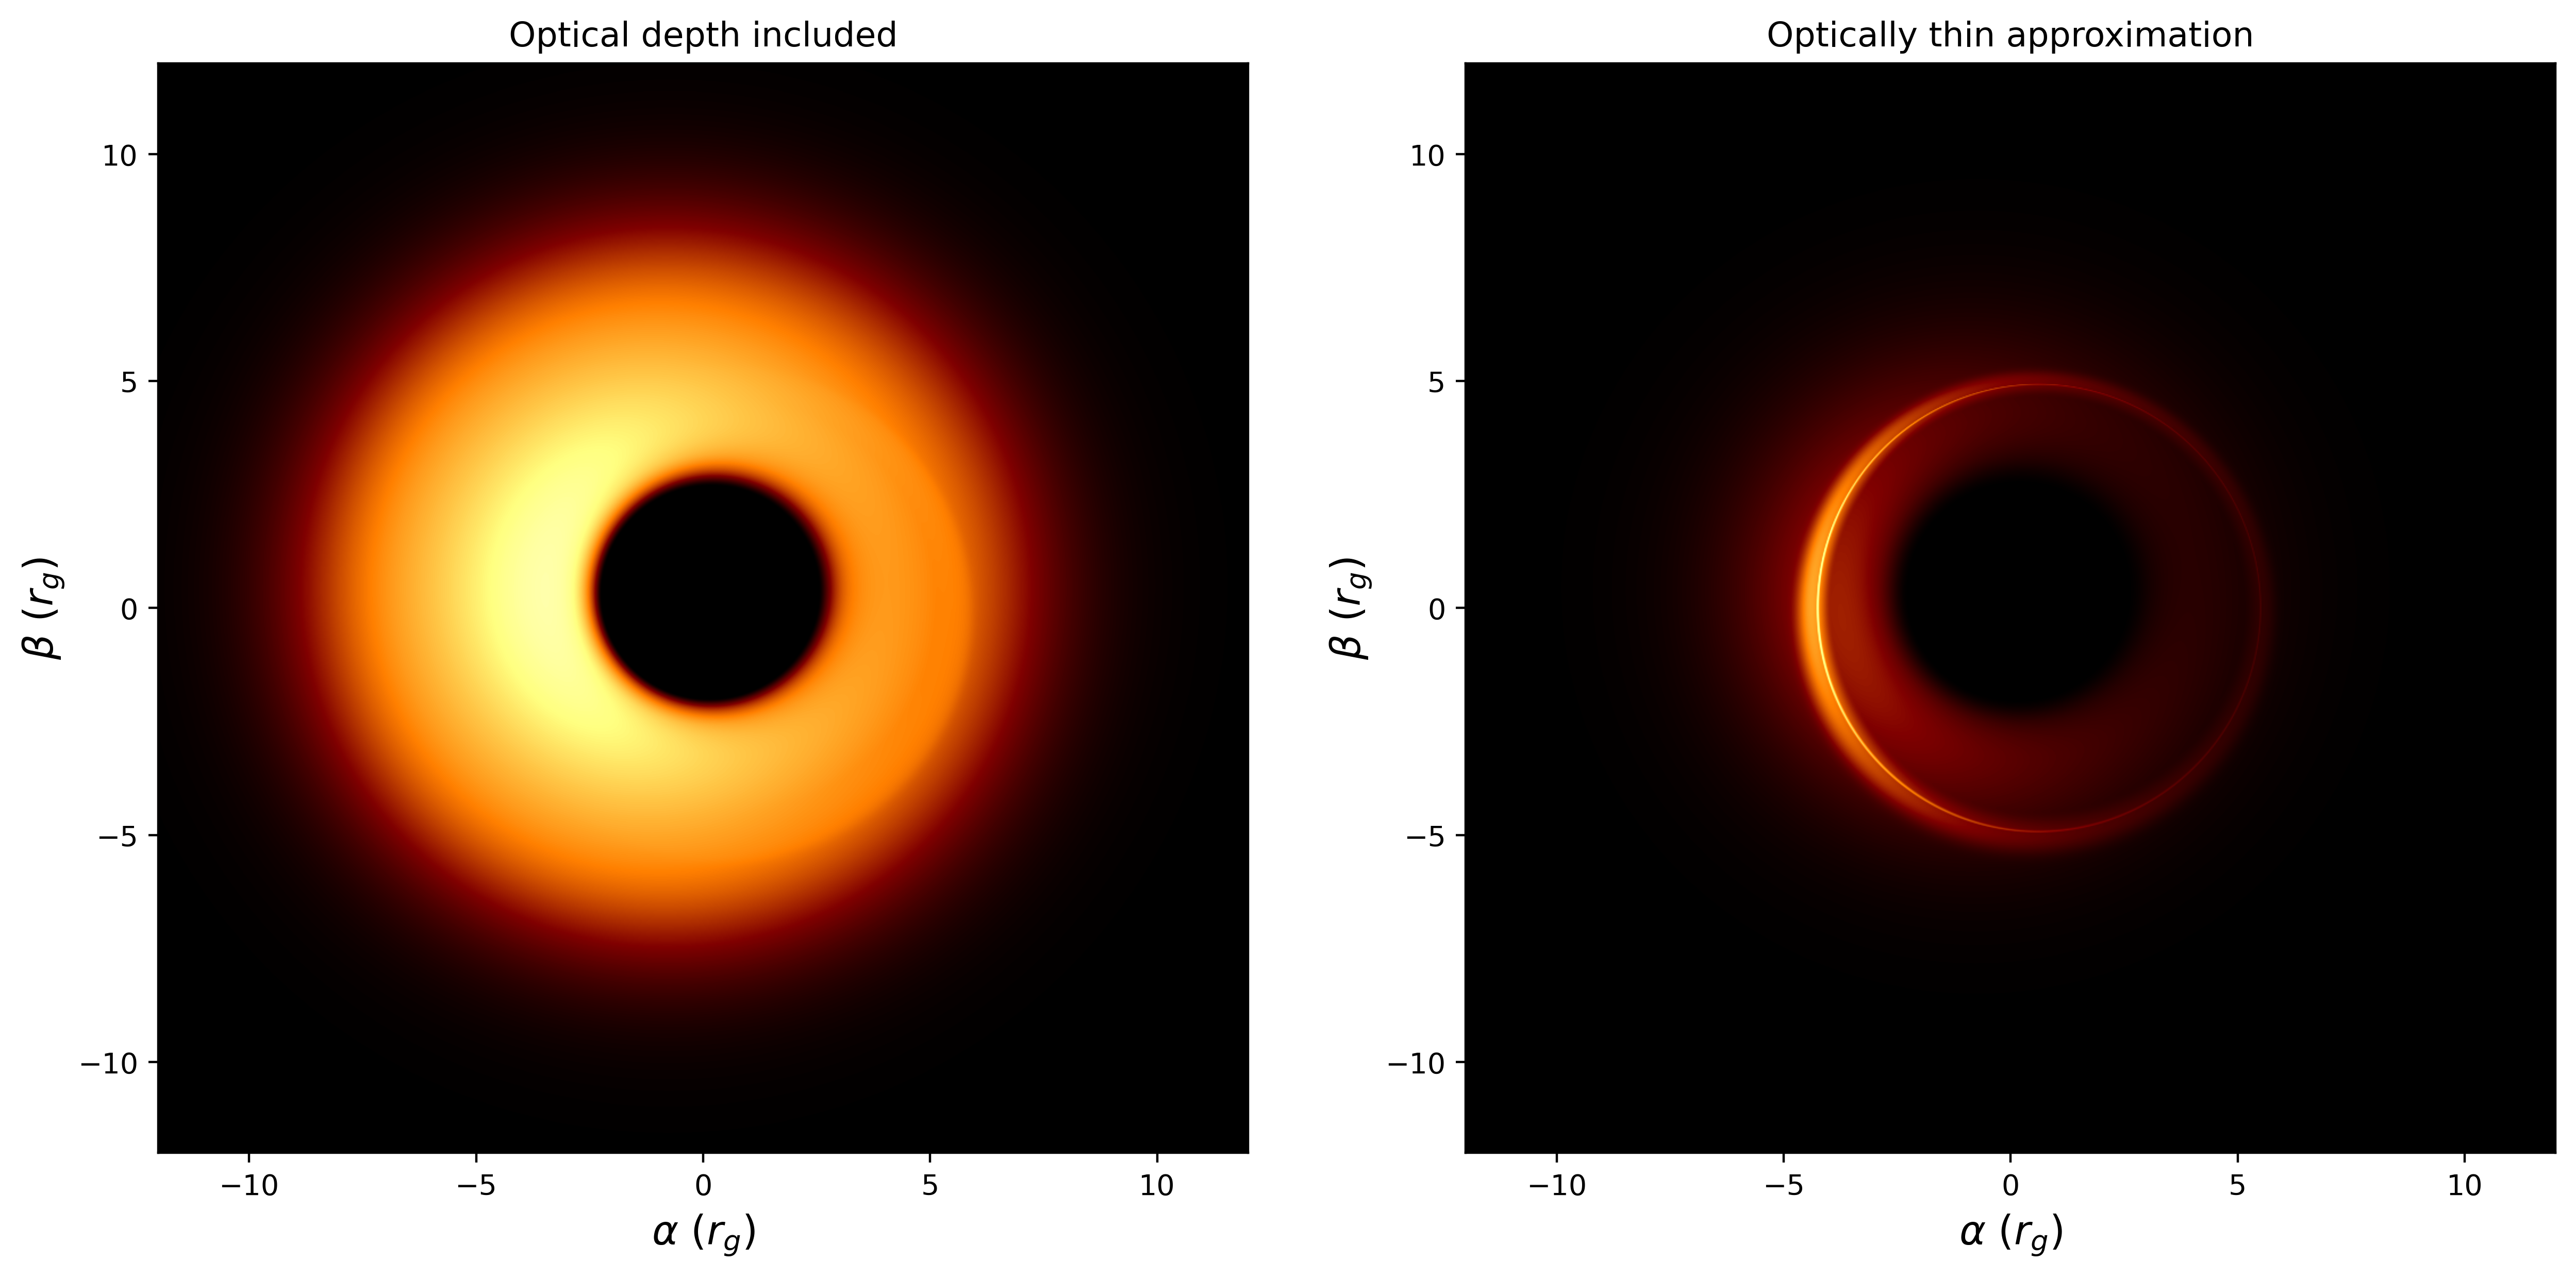

In [10]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=[15,7],dpi=400)

im0 = ax0.imshow(Absorbtion_Image, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(Absorbtion_Image)*1.2)

ax0.set_xlim(-12,12) # units of M
ax0.set_ylim(-12,12) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($r_g$)",fontsize=14)
ax0.set_ylabel(r"$\beta$"+" "+r"($r_g$)",fontsize=14)
ax0.set_title("Optical depth included")

im1 = ax1.imshow(totalThinImage, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(totalThinImage)*1.2)

ax1.set_xlim(-12,12) # units of M
ax1.set_ylim(-12,12) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($r_g$)",fontsize=14)
ax1.set_ylabel(r"$\beta$"+" "+r"($r_g$)",fontsize=14)
ax1.set_title("Optically thin approximation")

plt.savefig('TimeAveraged.png',dpi=400,bbox_inches='tight')

# Using inoisy to add time-variability

In [11]:
funckeys = {
		"emodelkey" : 0, # emodelkey Emission Model choice, 0 = thermal ultrarelativistic, 1 = power law (1 is WIP)
        "bkey" : 2,      # Type of magnetic field profile , 0 = true function from brodrick and loeb eq. 3, 1 = power law with lmfit values of 0, 2 = power law from values set in brightparams
        "nnoisykey" : 1, # nnoisykey Inoisy density. 0 = no noise, 1 = noise
        "tnoisykey" : 1, # tnoisykey Inoisy temperature. 0 = no noise, 1 = noise
        "bnoisykey" : 1, # bnoisykey Inoisy magnetic field. 0 = no noise, 1 = noise
        "theta_bkey": 0 # Variable impact parameter, 0 for varied, 1 for fixed
}

cmd= fileloading.createIntensityArgs(brightparams,funckeys=funckeys) # create the neccesary command line argument

In [12]:
%time subprocess.run([cmd], shell=True)

using default rtray
Reading file:  ./Results/Rays_a_0.9375_i_17.h5
using default magAng
Intensity
using default lband
Reading file:  ./Results/LensingBands_a_0.9375_i_17.h5
Reading file:  ./Results/Rays_a_0.9375_i_17.h5
File  ./Results/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.130e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_1_tnkey_1_bnkey_1_magkey_0.h5  created.
CPU times: user 1.73 ms, sys: 20.5 ms, total: 22.3 ms
Wall time: 5.84 s


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CompletedProcess(args=['python3 radialintensity.py --nu 90000000000.0 --mass 1.2924827500377644e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --rie 10.0 --rb0 5 --nth0 19000.0 --te0 70000000000.0 --b0 8.13 --pdens -0.7 --ptemp -1.0 --pmag -1.5 --nscale 0.2 --emodelkey 0 --bkey 2 --nnoisykey 1 --tnoisykey 1 --bnoisykey 1 --thetabkey 0 --lband 0 --rtray 0 --magang 0'], returncode=0)

In [13]:
fnrays = fileloading.intensityNameNoUnits(brightparams,funckeys) # find created file na,e
    
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

# Optically thin assumption
I0=h5f['bghts0'][:] # This implies I0 is 1 pass
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]
totalThinImage = I0 + I1 + I2

# Optical depth included RTE solution 
Absorbtion_Image =h5f['bghts_full_absorbtion'][:]
h5f.close()

Reading file:  ./Results/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.130e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_1_tnkey_1_bnkey_1_magkey_0.h5


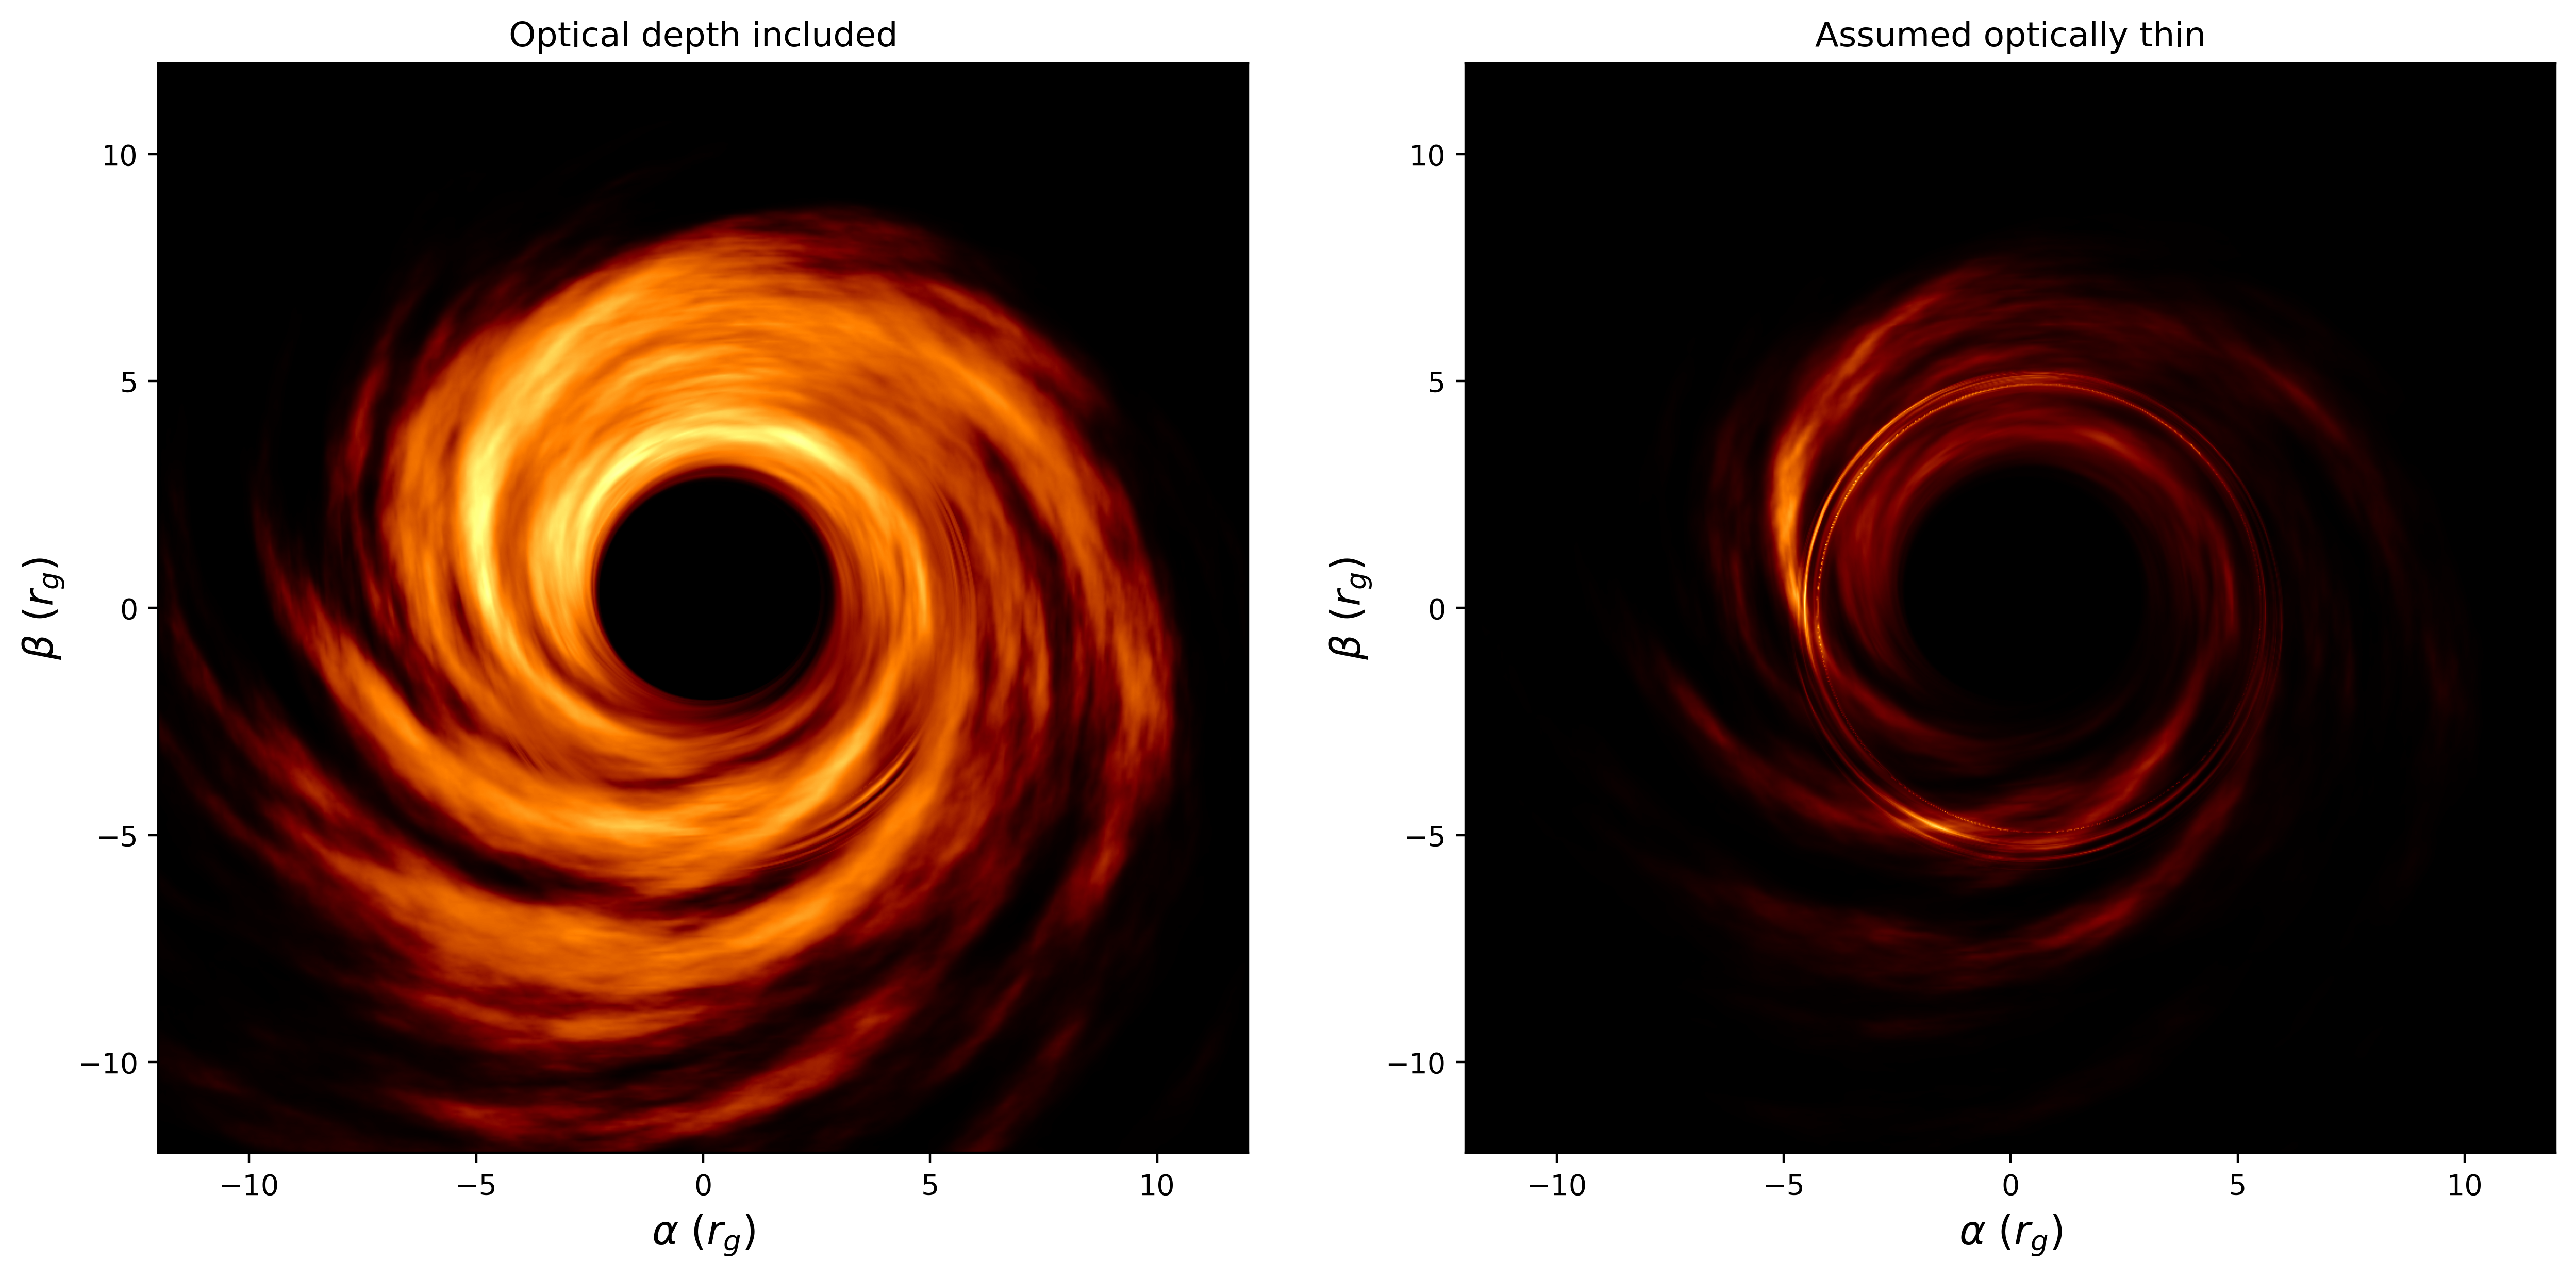

In [14]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=[15,7],dpi=400)

im0 = ax0.imshow(Absorbtion_Image, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(Absorbtion_Image)*1.2)

ax0.set_xlim(-12,12) # units of M
ax0.set_ylim(-12,12) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($r_g$)",fontsize=14)
ax0.set_ylabel(r"$\beta$"+" "+r"($r_g$)",fontsize=14)
ax0.set_title("Optical depth included")

im1 = ax1.imshow(totalThinImage, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(totalThinImage)*1.2)

ax1.set_xlim(-12,12) # units of M
ax1.set_ylim(-12,12) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($r_g$)",fontsize=14)
ax1.set_ylabel(r"$\beta$"+" "+r"($r_g$)",fontsize=14)
ax1.set_title("Assumed optically thin")

plt.savefig('Snapshots.png',dpi=400,bbox_inches='tight')

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to use, copy, modify, merge, 
publish, distribute, sublicense, and/or sell copies of the Software, and to permit 
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR 
PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, 
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN 
THE SOFTWARE.